In [74]:
import pandas as pd
import numpy

from sklearn import preprocessing, metrics
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

%matplotlib inline
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score,confusion_matrix,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

#### Problem Statement - Tennis Australia is trying to better automate how tennis points get categorized into three outcomes – winners, forced errors and unforced errors.

#### Dataset Description:

The dataset includes point outcomes of rallies only (where the number of shots hit exceeds two, which represents the serve and return). All points were played at a past Australian Open.


In [75]:
data = pd.read_csv("train_data.csv")

#### See the top 5 rows of the data

In [76]:
data.head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome,gender,ID
0,4,1,B,35.515042,-0.021725,3.474766,6.797621,False,False,1.467570,...,0.705435,12.5628,2.0724,True,F,0.445318,False,UE,mens,8644
1,4,2,B,33.382640,1.114202,2.540801,2.608708,False,True,2.311931,...,3.856600,12.3544,5.1124,False,B,0.432434,False,FE,mens,1182
2,23,1,B,22.316690,-0.254046,3.533166,9.435749,False,False,3.903728,...,2.908892,13.8620,1.6564,False,F,0.397538,True,FE,mens,9042
3,9,1,F,36.837309,0.766694,0.586885,3.342180,True,False,0.583745,...,0.557554,14.2596,0.1606,True,B,0.671984,True,UE,mens,1222
4,4,1,B,35.544208,0.116162,0.918725,5.499119,False,False,2.333456,...,3.945317,11.3658,1.1082,False,F,0.340411,False,W,mens,4085


#### Different classes in Outcome variable

In [77]:
pd.unique(data.outcome)

array(['UE', 'FE', 'W'], dtype=object)

#### Outcome variable - classes
* Winner – the point winning player hits a shot that is not touched by the opponent
* Forced error – the point winning player hits a shot that causes the opponent to not be able to return it, i.e. a good shot that is hard to handle
* Unforced error – the player attempting to return the ball makes an error on an otherwise normal looking rally shot

#### Check the number of columns

In [78]:
len(data.columns)

27

#### Display data type of each variable

In [79]:
data.dtypes

rally                                   int64
serve                                   int64
hitpoint                               object
speed                                 float64
net.clearance                         float64
distance.from.sideline                float64
depth                                 float64
outside.sideline                         bool
outside.baseline                         bool
player.distance.travelled             float64
player.impact.depth                   float64
player.impact.distance.from.center    float64
player.depth                          float64
player.distance.from.center           float64
previous.speed                        float64
previous.net.clearance                float64
previous.distance.from.sideline       float64
previous.depth                        float64
opponent.depth                        float64
opponent.distance.from.center         float64
same.side                                bool
previous.hitpoint                 

#### Identifying categorical attributes

In [80]:
categorical_list = ["hitpoint","outside.sideline",
                    "outside.baseline","same.side","previous.hitpoint","server.is.impact.player","gender"]

#### Converting to appropriate datatype

In [81]:
for i in data[categorical_list]:
    data[i] = data[i].astype("category")    

#### Display data type of each variable after conversion

In [82]:
data.dtypes

rally                                    int64
serve                                    int64
hitpoint                              category
speed                                  float64
net.clearance                          float64
distance.from.sideline                 float64
depth                                  float64
outside.sideline                      category
outside.baseline                      category
player.distance.travelled              float64
player.impact.depth                    float64
player.impact.distance.from.center     float64
player.depth                           float64
player.distance.from.center            float64
previous.speed                         float64
previous.net.clearance                 float64
previous.distance.from.sideline        float64
previous.depth                         float64
opponent.depth                         float64
opponent.distance.from.center          float64
same.side                             category
previous.hitp

#### Dropping ID column and checking the length of columns

In [83]:
data.drop(["ID"], axis=1, inplace=True)
len(data.columns)

26

#### Display summary statistics 

In [84]:
data.describe()

,rally,serve,speed,net.clearance,distance.from.sideline,depth,player.distance.travelled,player.impact.depth,player.impact.distance.from.center,player.depth,player.distance.from.center,previous.speed,previous.net.clearance,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,previous.time.to.net
count,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000
mean,5.966004,1.398700,30.806938,0.629658,1.467630,4.421146,2.690463,11.899694,1.919544,12.253954,1.213795,28.763676,0.821562,2.193420,4.218717,12.616810,2.367952,0.549988
std,3.548182,0.489661,7.298917,0.982504,1.108697,3.144965,1.713136,2.788231,1.205449,2.039085,0.964364,6.477470,0.674663,1.038942,2.052946,2.075401,1.313927,0.186788
min,3.000000,1.000000,5.176078,-0.998184,0.000497,0.003135,0.000000,2.156000,0.000200,1.389800,0.000400,8.449117,0.028865,0.000164,0.000467,2.161200,0.000200,0.003201
25%,3.000000,1.000000,26.770290,-0.027092,0.539500,1.641161,1.444233,11.221400,0.942400,11.374200,0.551800,24.033218,0.404815,1.354458,2.733674,12.082400,1.352200,0.432164
50%,5.000000,1.000000,32.417690,0.445870,1.210847,3.860266,2.360894,12.691800,1.829400,12.551600,0.983800,29.793417,0.658382,2.168822,4.126864,12.901600,2.332000,0.507559
75%,7.000000,2.000000,35.681431,0.970844,2.215955,7.029345,3.565853,13.553000,2.745200,13.498000,1.596600,33.581003,1.021397,3.022677,5.595515,13.712800,3.259000,0.624135
max,38.000000,2.000000,55.052795,12.815893,7.569757,11.886069,14.480546,18.125600,7.746200,18.745800,9.352600,54.207506,6.730275,4.114361,9.997963,20.211000,6.852600,1.635257


#### Checking for null values

In [85]:
data.isnull().sum()

rally                                 0
serve                                 0
hitpoint                              0
speed                                 0
net.clearance                         0
distance.from.sideline                0
depth                                 0
outside.sideline                      0
outside.baseline                      0
player.distance.travelled             0
player.impact.depth                   0
player.impact.distance.from.center    0
player.depth                          0
player.distance.from.center           0
previous.speed                        0
previous.net.clearance                0
previous.distance.from.sideline       0
previous.depth                        0
opponent.depth                        0
opponent.distance.from.center         0
same.side                             0
previous.hitpoint                     0
previous.time.to.net                  0
server.is.impact.player               0
outcome                               0


#### Display all the columns

In [86]:
data.columns

Index(['rally', 'serve', 'hitpoint', 'speed', 'net.clearance',
       'distance.from.sideline', 'depth', 'outside.sideline',
       'outside.baseline', 'player.distance.travelled', 'player.impact.depth',
       'player.impact.distance.from.center', 'player.depth',
       'player.distance.from.center', 'previous.speed',
       'previous.net.clearance', 'previous.distance.from.sideline',
       'previous.depth', 'opponent.depth', 'opponent.distance.from.center',
       'same.side', 'previous.hitpoint', 'previous.time.to.net',
       'server.is.impact.player', 'outcome', 'gender'],
      dtype='object')

#### Creating a list of numerical attributes

In [87]:
numeric_list = ['rally','serve','speed','net.clearance','distance.from.sideline','depth','player.distance.travelled','player.impact.depth','player.impact.distance.from.center','player.depth','player.distance.from.center','previous.speed','previous.net.clearance','previous.distance.from.sideline','previous.depth','opponent.depth','opponent.distance.from.center']
numeric_data = data[numeric_list]


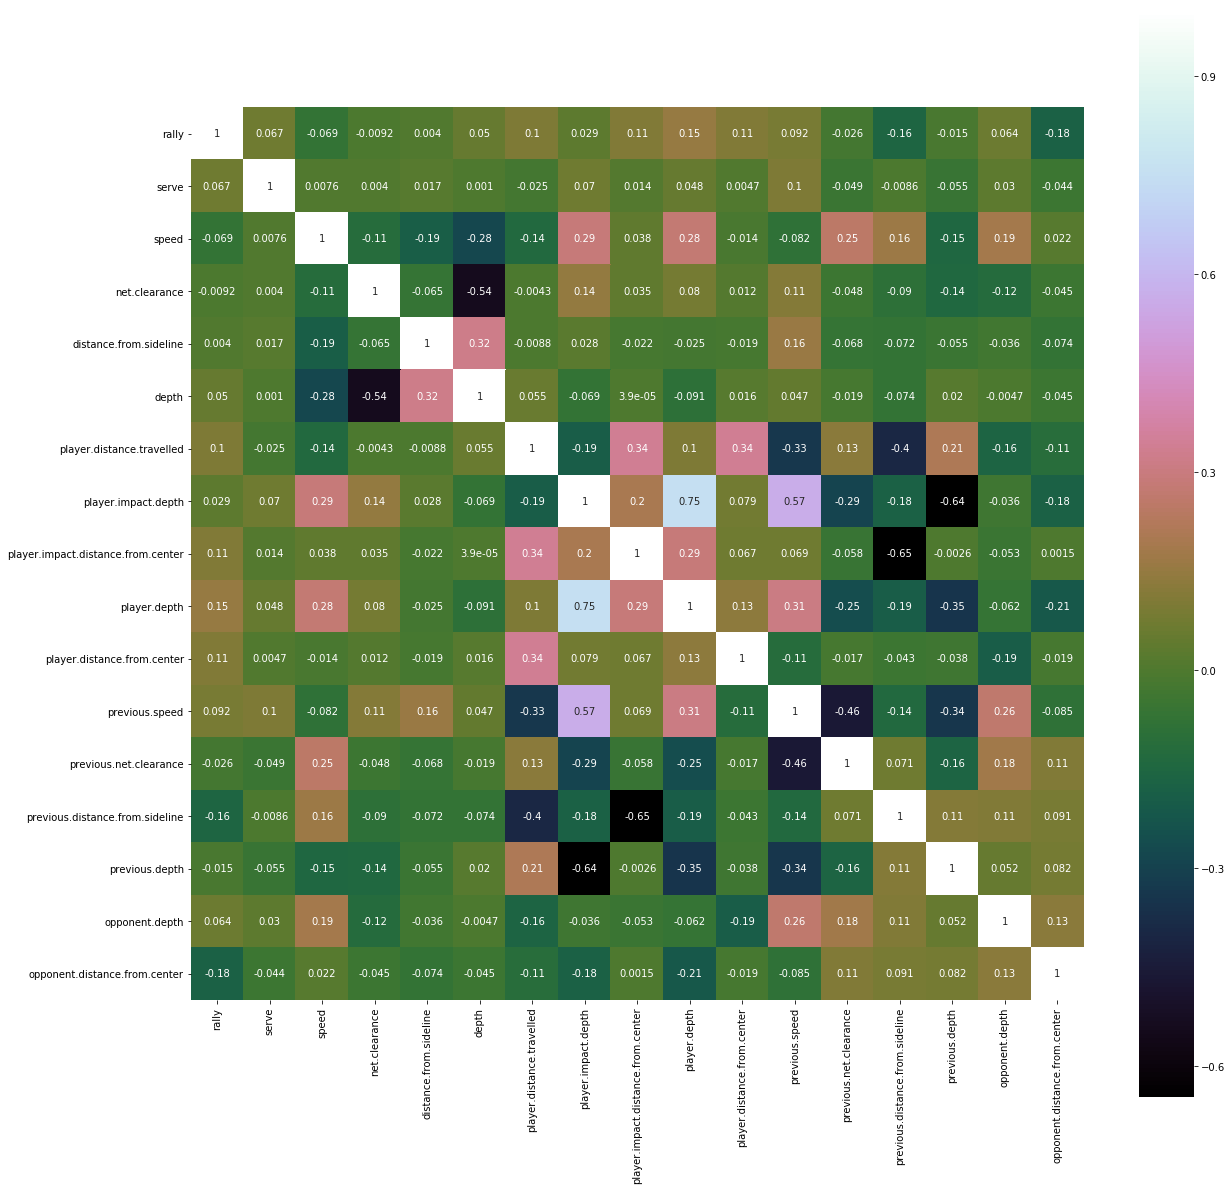

In [88]:
# Getting Correlation matrix
corr_mat=numeric_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat,square=True,annot=True,cmap='cubehelix')


In [89]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le1 = preprocessing.LabelEncoder()
for i in categorical_list:
    le1.fit(data[i])
    data[i] = le1.fit_transform(data[i])

In [90]:
data.head()

,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome,gender
0,4,1,0,35.515042,-0.021725,3.474766,6.797621,0,0,1.467570,...,2.449182,0.705435,12.5628,2.0724,1,1,0.445318,0,UE,0
1,4,2,0,33.382640,1.114202,2.540801,2.608708,0,1,2.311931,...,0.583291,3.856600,12.3544,5.1124,0,0,0.432434,0,FE,0
2,23,1,0,22.316690,-0.254046,3.533166,9.435749,0,0,3.903728,...,1.115250,2.908892,13.8620,1.6564,0,1,0.397538,1,FE,0
3,9,1,1,36.837309,0.766694,0.586885,3.342180,1,0,0.583745,...,3.256695,0.557554,14.2596,0.1606,1,0,0.671984,1,UE,0
4,4,1,0,35.544208,0.116162,0.918725,5.499119,0,0,2.333456,...,1.431146,3.945317,11.3658,1.1082,0,1,0.340411,0,W,0


In [91]:
# Divide into train and test
y=data["outcome"]
X=data.drop('outcome', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6400, 25)
(1601, 25)
(6400,)
(1601,)


In [92]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le1 = preprocessing.LabelEncoder()
y_train=le1.fit_transform( y_train)
y_test=le1.fit_transform( y_test)

#### Building Decision Tree

In [93]:
estimator = DecisionTreeClassifier(max_depth=4,random_state=123)
estimator.fit(X_train, y_train)
y_pred_ = estimator.predict(X_test)
print(accuracy_score(y_test,y_pred_))
print(classification_report(y_test,y_pred_,digits=4))

0.7464084946908183
              precision    recall  f1-score   support

           0     0.6496    0.4785    0.5511       372
           1     0.6894    0.8634    0.7667       725
           2     0.9332    0.7758    0.8472       504

   micro avg     0.7464    0.7464    0.7464      1601
   macro avg     0.7574    0.7059    0.7217      1601
weighted avg     0.7569    0.7464    0.7419      1601



## Random Forests

- Very simple yet very powerful machine learning algorithm
- As the name suggests: Builds a lot of trees within
- More robust for the obvious reasons
- We have a lot trees, thus lot pf predictions for the test class which enters, now the concept of majority voting.
- Can handle both classification and regression problems
- Extremely good to avoid overfitting

# Working

- Assume number of observations in training set is N. Then, sample of these N observations is taken at random but with replacement
- If the number of variables or features "m" we take square root of m features for node selection at each stage.
- There is no pruning done, trees are grown to the fullest depth
- New data is predicted by the majority voting method or averaging for regression problems

### Important Terminology
- Bagging or bootstrap aggregation
 - Randomly pick the dataset or sub sample the dataset but with replacement
 - Important point to remember, the size of the new dataset is same as the original dataset.

In [94]:
clf = RandomForestClassifier(n_estimators=100,random_state=1234)
clf.fit(X=X_train, y=y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,digits=4))

0.858213616489694
              precision    recall  f1-score   support

           0     0.7808    0.6989    0.7376       372
           1     0.8451    0.8731    0.8589       725
           2     0.9268    0.9544    0.9404       504

   micro avg     0.8582    0.8582    0.8582      1601
   macro avg     0.8509    0.8421    0.8456      1601
weighted avg     0.8559    0.8582    0.8564      1601



In [95]:
print(confusion_matrix(y_test, y_pred))

[[260 101  11]
 [ 65 633  27]
 [  8  15 481]]


#### Random Forest Parameters
* n_estimators is the number of trees in the forest
* max_depth is how deep each tree can be
* min_sample_leaf is the minimum samples required in each leaf node for the root node to split.
    "A node will only be split if in each of it's leaf nodes there should be min_sample_leaf".


In [96]:
## Use Grid Search for parameter tuning. (Exhaustive search over specified parameter values for an estimator)

from sklearn.model_selection import GridSearchCV

## n_jobs = -1 uses all cores of processor
## max_features is the maximum number of attributes to select for each tree

rfc_grid = RandomForestClassifier(n_jobs=-1, max_features='sqrt')
 
# Use a grid over parameters of interest

param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [5, 10],
           "min_samples_leaf" : [2, 4]}
 
rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid, cv = 10)

##### GridSearchCV implements a “fit” and a “score” method. 

In [97]:
## Fit the grid search model
rfc_cv_grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [9, 18, 27, 36, 45, 54, 63], 'max_depth': [5, 10], 'min_samples_leaf': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [98]:
## Print best score and parameters
print(rfc_cv_grid.best_score_,rfc_cv_grid.best_params_)

0.86984375 {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 36}


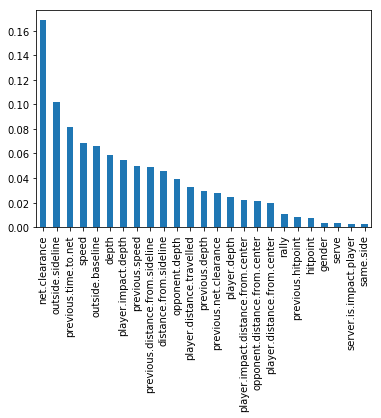

In [99]:
feat_importances_rf = pd.Series(clf.feature_importances_, index = X_train.columns)
feat_importances_ordered = feat_importances_rf.nlargest(n=len(feat_importances_rf))
feat_importances_ordered.plot(kind='bar')

## Model Building

### Build ADABOOST Classifier

1. Assign every observation, X(i), with an initial weight value, w(i) = 1/n, 
Where n is the total number of observations.
2. Train a **weak** model.
3. For each observation:
 <br>3.1. If predicted **incorrectly**, w(i) is **increased**.
 <br>3.2. If predicted **correctly**, w(i) i **decreased**.
4. Train a new weak model where observations with greater weights are given more priority.
5. Repeat steps 3 and 4 until observatons are perfectly predicted or a preset number of trees are trained. 

#### Create Adaboost Classifier

The most important parameters are base_estimator, n_estimators, and learning_rate.
-  **base_estimator** is the learning algorithm to use to train the weak models. This will almost always not needed to be changed because by far the most common learner to use with AdaBoost is a decision tree – this parameter’s default argument.
-  **n_estimators** is the number of models to iteratively train.
-  **learning_rate** is the contribution of each model to the weights and defaults to 1. Reducing the learning rate will mean the weights will be increased or decreased to a small degree, forcing the model train slower (but sometimes resulting in better performance scores).

In [100]:
# Create adaboost-decision tree classifer object
Adaboost_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators = 600,
    learning_rate = 1)

In [101]:
Adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=600, random_state=None)

In [102]:
y_preds = Adaboost_model.predict(X_test)

In [103]:
print(accuracy_score(y_test, y_preds))

0.8344784509681449


In [104]:
param_grid = {'n_estimators' : [100, 150, 200],
              'learning_rate' : [0.1, 0.5, 0.9]}

Adaboost_model_clf = GridSearchCV(AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=-1)

In [105]:
Adaboost_model_clf.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [106]:
best_ada_model = Adaboost_model_clf.best_estimator_
print (Adaboost_model_clf.best_score_, Adaboost_model_clf.best_params_) 

0.85390625 {'learning_rate': 0.1, 'n_estimators': 150}


In [107]:
y_pred_test = best_ada_model.predict(X_test)

In [108]:
print(accuracy_score(y_test,y_pred_test))

0.8326046221111805


In [109]:
print(confusion_matrix(y_test, y_pred_test))

[[220 135  17]
 [ 58 632  35]
 [ 10  13 481]]


## Build Gradient Boosting Classifier

Gradient boosting is a type of boosting. 

The key idea behind gradient boosting is to set the target outcomes for this next model in order to minimize the error. The target outcome for each case in the data set depends on how much a change in that case’s prediction impacts the overall prediction error.

If, for case X(i), a small change in the prediction causes a large drop in error, then the next target outcome is a high value. Predictions from the new model that are close to its targets will reduce the error.

If, for case X(j), a small change in the prediction causes no change in error, then the next target outcome is zero because changing this prediction does not decrease the error.

The name gradient boosting arises because of setting target outcomes based on the gradient of the error with respect to the prediction of each case. Each new model takes a step in the direction that minimizes prediction error, in the space of possible predictions for each training case.

1. Initialize the outcome
2. Iterate from 1 to total number of trees
  <br>2.1 Update the weights for targets based on previous run (higher for the ones mis-classified)
  <br>2.2 Fit the model on selected subsample of data
  <br>2.3 Make predictions on the full set of observations
  <br>2.4 Update the output with current results taking into account the learning rate
3. Return the final output.

The most important parameters are learning_rate, n_estimators and subsample
- **learning_rate**
    -  This determines the impact of each tree on the final outcome (step 2.4). GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.
    -  Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.
    -  Lower values would require higher number of trees to model all the relations and will be computationally expensive.
- **n_estimators**
    -  The number of sequential trees to be modeled (step 2)
    -  Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV for a particular learning rate.
- **subsample**
    -  The fraction of observations to be selected for each tree. Selection is done by random sampling.
    -  Values slightly less than 1 make the model robust by reducing the variance.
    -  Typical values ~0.8 generally work fine but can be fine-tuned further.

In [110]:
GBM_model = GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.3,
                                       subsample=0.8)

In [111]:
GBM_model.fit(X=X_train, y=y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [112]:
y_pred = GBM_model.predict(X_test)

In [113]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,digits=4))

0.8594628357276702
              precision    recall  f1-score   support

           0     0.7801    0.7151    0.7461       372
           1     0.8554    0.8648    0.8601       725
           2     0.9165    0.9583    0.9370       504

   micro avg     0.8595    0.8595    0.8595      1601
   macro avg     0.8507    0.8461    0.8477      1601
weighted avg     0.8571    0.8595    0.8578      1601



In [114]:
from sklearn.model_selection import GridSearchCV

# Model in use
GBM = GradientBoostingClassifier() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [100,150],
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.2]}
 
CV_GBM = GridSearchCV(estimator=GBM, param_grid=param_grid, cv= 5)

In [115]:
CV_GBM.fit(X=X_train, y=y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 150], 'max_depth': [5, 10], 'learning_rate': [0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [116]:
# Find best model
best_gbm_model = CV_GBM.best_estimator_
print (CV_GBM.best_score_, CV_GBM.best_params_)

0.8753125 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}


In [117]:
y_pred_test=best_gbm_model.predict(X_test)

In [118]:
print(accuracy_score(y_test,y_pred_test))

0.8557151780137414


In [119]:
print(confusion_matrix(y_test, y_pred_test))

[[268  91  13]
 [ 70 622  33]
 [ 12  12 480]]


In [125]:
#!pip install vecstack
from vecstack import stacking

In [126]:
models = [
        RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.3,
                                       subsample=0.8),


  AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators = 600,
    learning_rate = 1)
]



In [127]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [3]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestClassifier]
    fold  0:  [0.80512180]
    fold  1:  [0.82760775]
    fold  2:  [0.80737961]
    fold  3:  [0.78799250]
    ----
    MEAN:     [0.80702541] + [0.01405021]
    FULL:     [0.80703125]

model  1:     [GradientBoostingClassifier]
    fold  0:  [0.86508432]
    fold  1:  [0.88007495]
    fold  2:  [0.86866792]
    fold  3:  [0.86616635]
    ----
    MEAN:     [0.86999839] + [0.00596112]
    FULL:     [0.87000000]

model  2:     [AdaBoostClassifier]
    fold  0:  [0.82448470]
    fold  1:  [0.84821986]
    fold  2:  [0.83989994]
    fold  3:  [0.84177611]
    ----
    MEAN:     [0.83859515] + [0.00871150]
    FULL:     [0.83859375]



In [134]:
model = RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.85509057]
